# BMI AND ALCOHOL CONSUMPTION IN IRELAND
## AUTHOR: ANTE DUJIC
<hr style="border:2px solid black"> </hr>

## INTRODUCTION
<hr style="border:2px solid gray"> </hr>

This notebook contains a step by step simulated dataset of a relationship between BMI and Alcohol consumption in Ireland. The data is modeled and synthesised using *numpy.random* package in Python. 

Body mass index (BMI) is a value derived from the mass (weight) and height of a person. The BMI is defined as the body mass divided by the square of the body height, and is expressed in units of kg/m2, resulting from mass in kilograms and height in metres. [1]  It is widely used to diagnose whether individuals are underweight, overweight, or obese. [2] BMI is accepted as the most useful indicator of obesity in adults when only weight and height data are available. [10] Alcohol consumption is often linked to a high weight. Drinking more than seven times per week was associated with increased risk of weight gain and development of overweight and obesity. [3]

This project is separated into the three sections. First section is a Research section, where I'll explain what each variable represents and it's real life properties. In second section, Simulation, I will simulate each of the variables based on the research done. Data Analysis is the last section and here I will analyse the generated database and see if and how it reflects the real life. 

<center><img src="https://i2.wp.com/www.sarahwilkins.net/wp-content/uploads/2015/03/sarah-wilkins-wine-1.jpg" width="300"/></center>



### CONTENTS

- [RESEARCH](#RESEARCH)
- [SIMULATION](#SIMULATION)
- [DATA ANALYSIS](#ANALYSIS)
***

## RESEARCH
<hr style="border:2px solid gray"> </hr>

The goal of this project is to create a dataset that will reflect the real life, with its destribution and relationships. This section shows what the properties of each variable that will get generated are.


In [1]:
# Libraries.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import names

In [2]:
plt.rcParams["figure.figsize"] = (25, 7)
plt.style.use("ggplot")

In [3]:
np.random.seed(2021)

#### ID

The simulated database will be a sample of a population taken for a reasearch purposes. ID in this dataset will represent each person in the sample. There were two approaches considered for this project, to either create a list of numbered persons (e.g. Person 1, Person 2, ...)  or name each individual. I've opted for the second one, but both will be shown below. This data will be generated after generating *Gender*, to connect the name to it's corresponding gender.

In [4]:
# Creating a list of numerated persons.
person = []
for i in range (1, 6):
    person.append ("Person {}".format(i))
person

['Person 1', 'Person 2', 'Person 3', 'Person 4', 'Person 5']

In [5]:
# Creating a list of names. [1]
for i in range(5):
    print(names.get_full_name(), end=', ')

Eli Snow, Gerald Anthony, Marcia Phillips, Darrell Binford, Donald Green, 

#### GENDER

Gender is a categorical variable [5] and it can have two values: *male* and *female*. According to the latest World Bank data from 2020., percentage of female in Irish population is 50.4% [6] Male population is then 49.6%. I will use *random.choice* function to generate this data. For the sake of this project, I will round these percentages to 51% for female and 49% for male.

#### AGE

Age is a quantitative continuous variable. [11] Based on my research, it seem to follow normal distribution, if taken from the whole population, but a skewed one if taken of the sample of population. The avarage age in Ireland in 2020. was 38.2. [7] I will use Normal distribution to generate this data, but have the range set to match the mentioned properties.

#### HEIGHT AND WEIGHT

Both height and weight are normally distributed. There is also a strong relationship between the two. As height increases, weight also tends to increase. [8] The avarage male height is 1.79m and weight is 89.2kg. Avarage female height is 1.64m and avarage weight is 73.1kg. [9]  Both variables are generated at the same time, with set correlation between them. They are also generated separately for each gender. I will use *multivariate_normal* function for this purpose. This will create normally distributed correlated data.

#### BMI

As mentioned before, BMI is a value calculated from persons height and weight. The formula is weight in kilograms divided by height in meters squared. I will generate this data using the mentioned formula.

#### BMI CLASSIFICATION

There are a few different ranges used for BMI classification. The following subdivisions are used to categorise the BMI in Europe: [10]

| BMI (kg/m^2)| CLASSIFICATION |
| :- | :- |
| \< 18.5 | underweight |
| \>= 18.5 and < 25 | normal weight |
| \>= 25 | overweight |
| \>= 30 | obese |

Ireland has one of the highest levels of obesity in Europe, with 60% of adults living with overweight and obesity. [12] We'll see in data analysis if using the reasearched properties will result in these figures.

#### ALCOHOL CONSUMPTION

As already stated, there are researches showing how alcohol consumption is closely linked to BMI, in particular with weight. Average BMI is increased with an increased level of alcohol consumption in men and women. [4] Gamma distribution is recommended to model alcohol consumption from population surveys due to its fit, flexibility, and the ease with which it can be modified. [13] Scale and shape for Gamma distribution for female in Ireland are 15.55 and 0.91, and for man 38.58 and 0.98 [14,15] I haven't been able to find a fitting function or a code in Python (numpy) to create a correlated data with any distribution other then the normal one. I've decided to generate this data using the normal distribution, matching the gamma one as close as possible. Test to see if this will produce the wanted result is shown below.

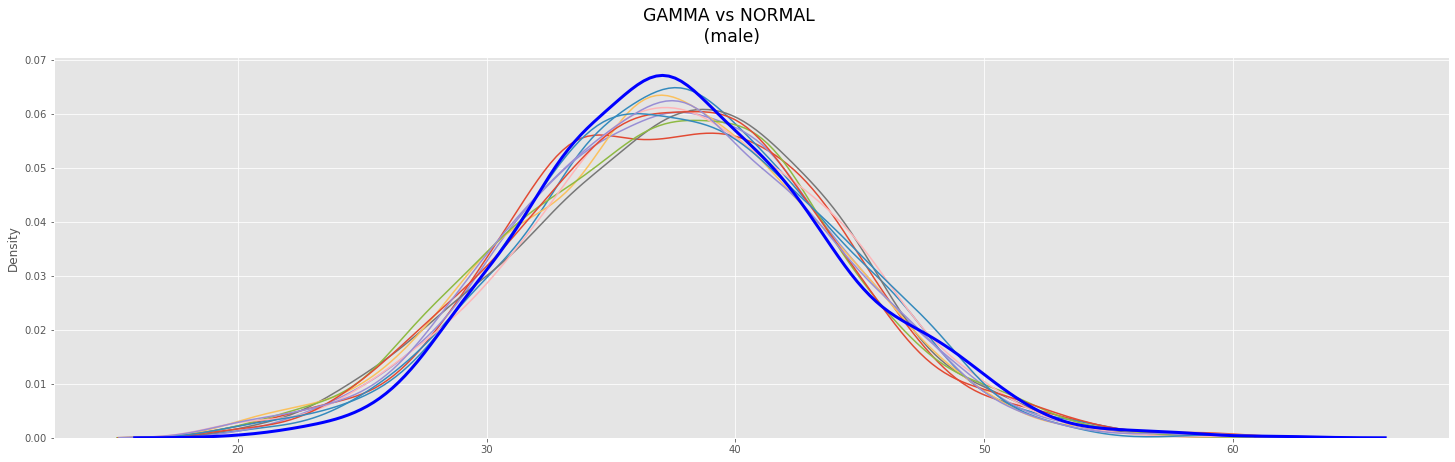

In [6]:
# Testing if normal distribution can be used to generate alcohol consuption.
    # Plot 10 normal kde plots.
for i in range (10):
    rng = np.random.default_rng()
    n = []
    for i in range(1000):
        a = np.clip(np.random.normal(37.5, 6.3), 20, 100)
        n.append((a))
    sns.kdeplot(n, alpha = 0.7)
    # Plot gamma kde plot.
g = rng.gamma(38.57,0.98, 1000)
sns.kdeplot (g, linewidth = 3, color = "b")
plt.suptitle ("GAMMA vs NORMAL\n (male)", size = "xx-large")
plt.show()

We can see on the plot that gamma distribution has a bell curve, slightly skewed to the left (blue line). All the other lines are randomly generated values in normal distribution and it is visible that they very closely match the gamma distribution. Therefore, normal distribution is deemed to be good for generating alcohol consumption. Considering it is correlated with weight it will be generated with height and weight using *multivariate_normal* function.

## SIMULATION
<hr style="border:2px solid gray"> </hr>

In [7]:
df = pd.DataFrame(index=None)

#### AGE

In [8]:
# Generating gender with set probability.
gender_choice = ["Female", "Male"]
gender = rng.choice (gender_choice, p = [0.51, 0.49], size = 1000)
df["gender"] = gender
df["gender"].value_counts()

Female    503
Male      497
Name: gender, dtype: int64

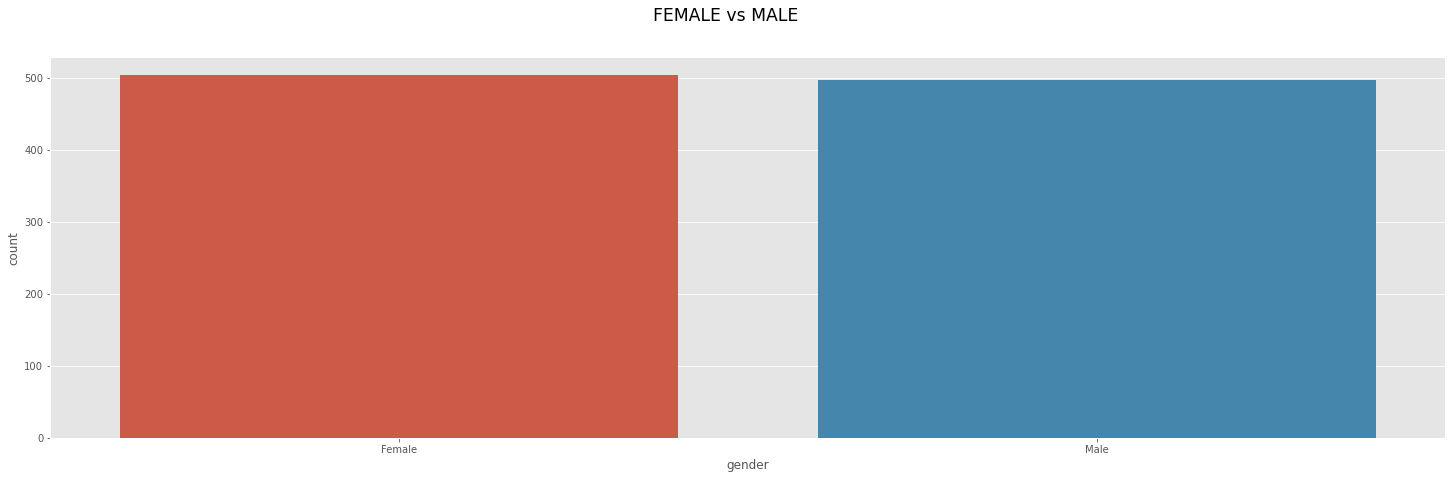

In [9]:
sns.countplot(x = df["gender"])
plt.suptitle ("FEMALE vs MALE", size = "xx-large")
plt.show()

The plot shows the number of female is higher then the number of male, according to our research. The data matches the reasearched properties.

In [10]:
df.head()

,gender
0,Female
1,Male
2,Male
3,Male
4,Male


#### ID

In [11]:
# Defining fuction
    # Check the gender value and crate name.
def applyFunc(s):
    if s == "Male":
        male_name = names.get_full_name(gender='male')
        return male_name
    elif s == "Female":
        female_name = names.get_full_name(gender='female')
        return female_name
# Applying function to the gender column in df.    
names = df["gender"].apply(applyFunc)
# Insert the name column at the start of df.
df.insert(0, "name", names)

In [12]:
df.head()

,name,gender
0,Virginia Reyna,Female
1,Josh Cuthbert,Male
2,Alfred Ellerbe,Male
3,David Ernst,Male
4,Luther Stanwick,Male


#### AGE

In [13]:
# Generating age using normal distribution (but clipping the data) [2]
age = []
for i in range(1000):
    a = np.clip(np.random.normal(38.2, 15), 18, 100)
    age.append(int(a))
df["age"] = age

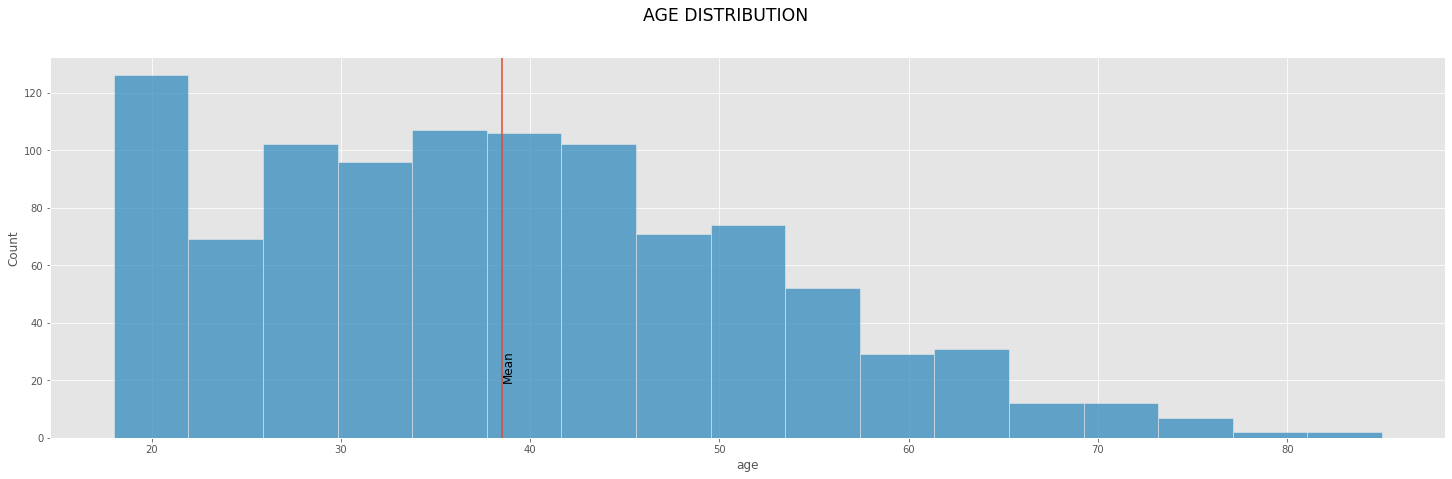

In [14]:
mean = np.mean(df["age"])

sns.histplot (df["age"])
plt.suptitle ("AGE DISTRIBUTION", size = "xx-large")
plt.axvline (mean)
plt.text (x = mean, y = 25, s = "Mean", 
          fontsize = 12, rotation = "vertical", va = "center")
plt.show()

The plot shows that the data is distributed with the skew to the left. The avarage age is appox. 38.2. The data matches the reasearched properties.

In [15]:
df.head()

,name,gender,age
0,Virginia Reyna,Female,57
1,Josh Cuthbert,Male,35
2,Alfred Ellerbe,Male,33
3,David Ernst,Male,53
4,Luther Stanwick,Male,18


#### HEIGHT, WEIGHT AND ALCOHOL CONSUMPTION

As stated before, due to the correlation of those three variables, they all get generated simultaniously.

In [16]:
# Defining a function.
    # Check the gender value and 
    # generate height (h), weight (w) and alcohol consumption (ac).
def applyFunc(s):
    if s == "Male":
        m_means = [179, 85, 38.57] # means for h, w and ac.
        m_stds = [5, 5, 5] #standard deviation for h, w and ac.
        m_corr = 0.6 # high correlation h vs w
        m_pcorr = 0.3 # lower correlation w vs ac
        m_ncorr = 0.1 # very low correlation h vs ac
        # Covariance (correlation) matrix
            # 1 row: h against h, w and ac.
            # 2 row: w against h, w and ac.
            # 3 row: ac against h, w and ac.
        m_covs = [[m_stds[0]**2, m_stds[0]*m_stds[1]*m_corr, m_stds[0]*m_stds[2]*m_ncorr], 
                [m_stds[0]*m_stds[1]*m_corr, m_stds[1]**2, m_stds[1]*m_stds[2]*m_pcorr ],
                [m_stds[0]*m_stds[2]*m_ncorr, m_stds[1]*m_stds[2]*m_pcorr, m_stds[2]**2 ]]
        #  Multivariate normal distribution
        m_data = rng.multivariate_normal(m_means, m_covs)       
        m_data = m_data.round(1)
        return m_data[0], m_data[1], m_data[2]
    if s == "Female": # Same as for Male but some different values.
        f_means = [164, 65, 15]
        f_stds = [5, 5, 5]
        f_corr = 0.6
        f_ncorr = 0.1
        f_pcorr = 0.3
        f_covs = [[f_stds[0]**2, f_stds[0]*f_stds[1]*f_corr, f_stds[0]*f_stds[2]*f_ncorr], 
                [f_stds[0]*f_stds[1]*f_corr, f_stds[1]**2, f_stds[1]*f_stds[2]*f_pcorr ],
                [f_stds[0]*f_stds[2]*f_ncorr, f_stds[1]*f_stds[2]*f_pcorr, f_stds[2]**2 ]]
        f_data = rng.multivariate_normal(f_means, f_covs)       
        f_data = f_data.round(1)
        return f_data[0], f_data[1], f_data[2]

# Create an array based on gender
hwac = df["gender"].apply(applyFunc)
# Assign array elements [3]
df["height"]= hwac.str[0]
df["weight"]= hwac.str[1]
df["alcohol_con"]= hwac.str[2]

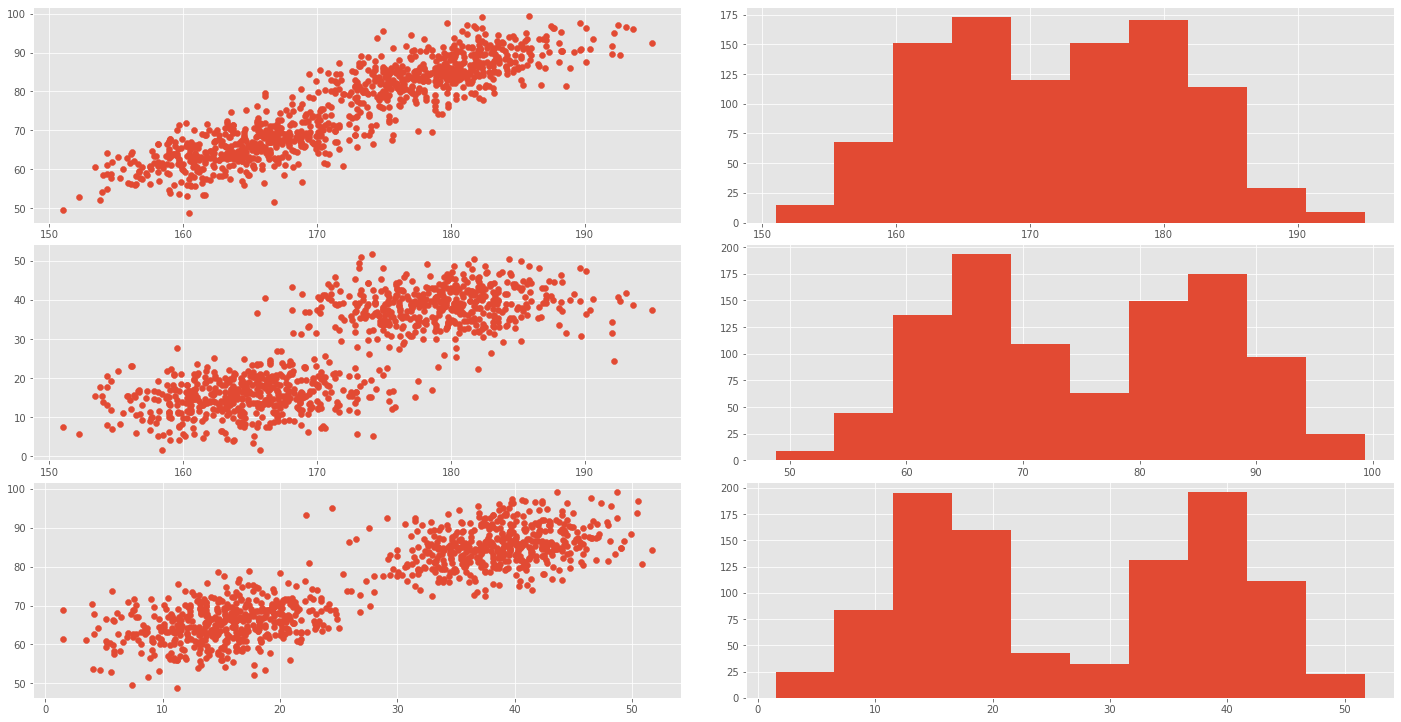

In [17]:
# Creating figure for plotting.
fig = plt.figure(figsize =(9, 3))

# Creating each figure.
ax1 = fig.add_axes([1, 2.7, 1, 1])
ax2 = fig.add_axes([1, 1.6, 1, 1]) 
ax3 = fig.add_axes([1, 0.5, 1, 1]) 
ax4 = fig.add_axes([2.1, 2.7, 1, 1])
ax5 = fig.add_axes([2.1, 1.6, 1, 1]) 
ax6 = fig.add_axes([2.1, 0.5, 1, 1]) 

ax1.scatter (x = df["height"], y = df["weight"])
ax2.scatter (x = df["height"], y = df["alcohol_con"])
ax3.scatter (x = df["alcohol_con"], y = df["weight"])
ax4.hist (df["height"])
ax5.hist (df["weight"])
ax6.hist (df["alcohol_con"])
plt.show()

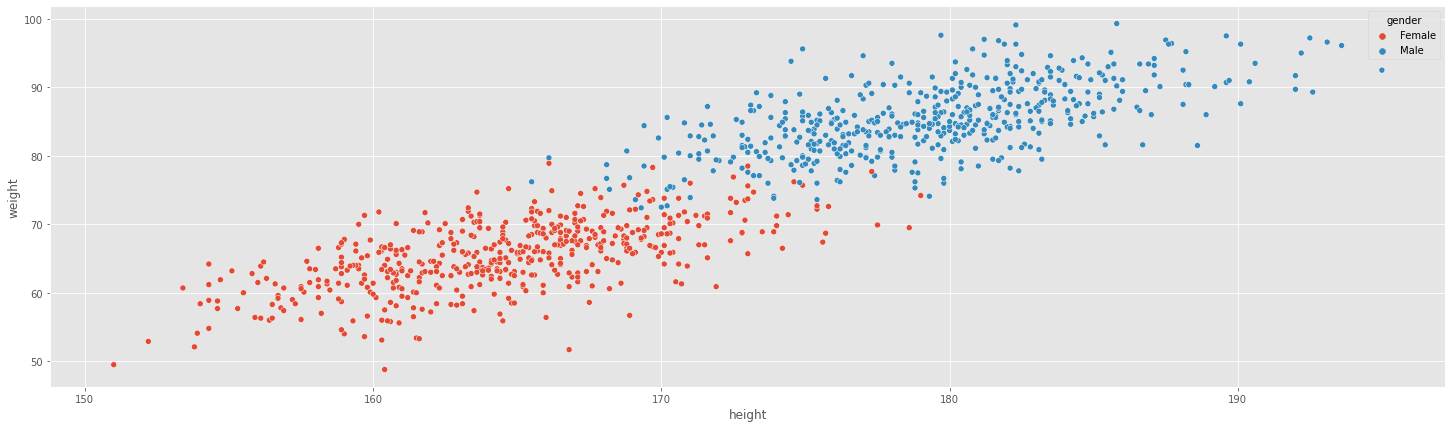

In [18]:
sns.scatterplot (x = df["height"], y = df["weight"], hue = df["gender"])
plt.show()

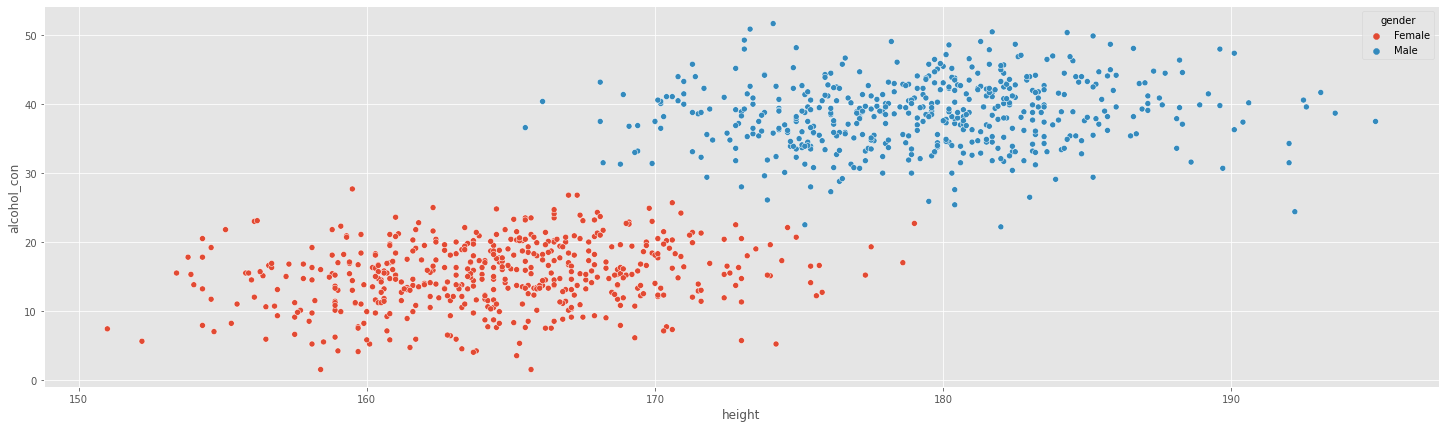

In [19]:
sns.scatterplot (x = df["height"], y = df["alcohol_con"], hue = df["gender"])
plt.show()

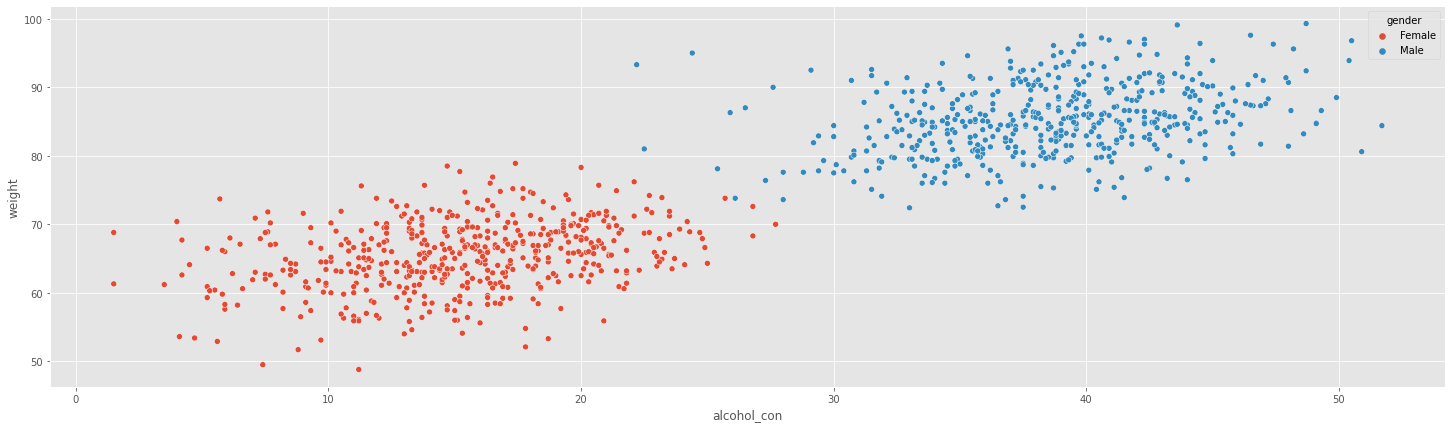

In [20]:
sns.scatterplot (x = df["alcohol_con"], y = df["weight"], hue = df["gender"])
plt.show()

#### BMI

In [21]:
bmi = (df["weight"] / ((df["height"])/100)**2).round(1)
df.insert(5, "bmi", bmi)

In [22]:
df.head()

,name,gender,age,height,weight,bmi,alcohol_con
0,Virginia Reyna,Female,57,162.7,58.3,22.0,16.3
1,Josh Cuthbert,Male,35,177.1,81.2,25.9,38.2
2,Alfred Ellerbe,Male,33,176.0,85.3,27.5,42.8
3,David Ernst,Male,53,179.6,84.7,26.3,39.0
4,Luther Stanwick,Male,18,181.7,89.7,27.2,38.4


#### BMI CLASSIFICATION

In [23]:
def applyFunc(s):
    if s <18.5:
        return "Underweight"
    elif s >=18.5 and s <25:
        return "Healthy weight"
    elif s >=25 and s <30:
        return "Overweight"
    elif s >=30 and s <40:
        return "Obese"
df["bmi_class"] = df["bmi"].apply(applyFunc)
df["bmi_class"].value_counts()

Overweight        589
Healthy weight    407
Obese               4
Name: bmi_class, dtype: int64

In [27]:
df.head()

,name,gender,age,height,weight,bmi,alcohol_con,bmi_class
0,Virginia Reyna,Female,57,162.7,58.3,22.0,16.3,Healthy weight
1,Josh Cuthbert,Male,35,177.1,81.2,25.9,38.2,Overweight
2,Alfred Ellerbe,Male,33,176.0,85.3,27.5,42.8,Overweight
3,David Ernst,Male,53,179.6,84.7,26.3,39.0,Overweight
4,Luther Stanwick,Male,18,181.7,89.7,27.2,38.4,Overweight


<AxesSubplot:xlabel='bmi_class', ylabel='count'>

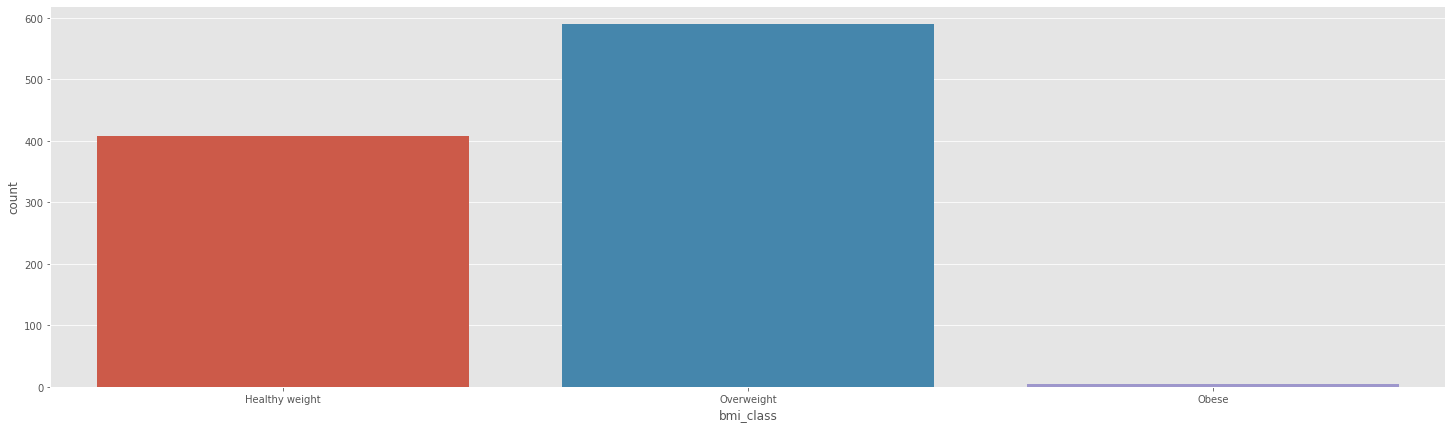

In [28]:
sns.countplot (x = df["bmi_class"])

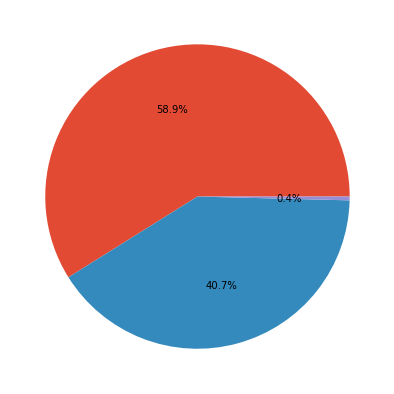

In [29]:
count = df["bmi_class"].value_counts()
plt.pie(count, autopct='%1.1f%%')
plt.show()

## REFERENCES

### MAIN

- [1] https://en.wikipedia.org/wiki/Body_mass_index
- [2] https://www.hindawi.com/journals/tswj/2012/849018/
- [3] https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4338356/
- [4] https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6484200/
- [5] https://builtin.com/data-science/data-types-statistics
- [6] https://data.worldbank.org/indicator/SP.POP.TOTL.FE.ZS?locations=IE
- [7] https://www.worldometers.info/world-population/ireland-population/
- [8] https://statisticsbyjim.com/basics/correlations/
- [9] https://www.worlddata.info/average-bodyheight.php
- [10] https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Glossary:Body_mass_index_(BMI)
- [11] https://www.mayo.edu/research/documents/data-types/doc-20408956
- [12] https://www.hse.ie/eng/about/who/cspd/ncps/obesity/
- [13] https://pophealthmetrics.biomedcentral.com/articles/10.1186/1478-7954-10-6
- [14] https://pophealthmetrics.biomedcentral.com/articles/10.1186/1478-7954-10-6/tables/1
- [15] https://pophealthmetrics.biomedcentral.com/articles/10.1186/1478-7954-10-6/tables/2

### CODE

- [1] https://moonbooks.org/Articles/How-to-generate-random-names-first-and-last-names-with-python-/
- [2] https://stackoverflow.com/questions/18441779/how-to-specify-upper-and-lower-limits-when-using-numpy-random-normal
- [3] https://stackoverflow.com/questions/29550414/how-can-i-split-a-column-of-tuples-in-a-pandas-dataframe
- [4]
- [5] https://stackoverflow.com/questions/18683821/generating-random-correlated-x-and-y-points-using-numpy


OTHER


AGE
- https://stats.stackexchange.com/questions/129417/if-my-histogram-shows-a-bell-shaped-curve-can-i-say-my-data-is-normally-distrib
- http://www.talkstats.com/threads/can-age-be-treated-as-normally-distributed.11875/

### IMAGES

- https://i2.wp.com/www.sarahwilkins.net/wp-content/uploads/2015/03/sarah-wilkins-wine-1.jpg